In [63]:
# relevent libraries

# install.packages("quantmod")
# install.packages("fredr")
# install.packages("ggfortify")
# install.packages('urca')
# install.packages("tseries")
# install.packages("forecast")
# install.packages("dynlm")
# install.packages("stargazer")
# install.packages("pracma")
# install.packages("dLagM")
# install.packages("gets")
# install.packages("car")
# install.packages("lmtest")
# install.packages("vars")
# install.packages("tseries")
# install.packages("strucchange")
# install.packages("graphics")
# install.packages("grDevices")
# install.packages("tsDyn")
options(warn=-1)

In [64]:
library(xts)
library(zoo)
library(ggplot2)
library(ggfortify)

In [65]:
data <- read.csv('dataset.csv')

head(data)

tail(data)

,Column1,Crude.Oil.Prices..Brent...Europe,CPIAUCSL2,OPEC.Production..Mb.d.,USD.per.Metric.Ton.Coal,USD.per.Million.Metric.British.Thermal.Unit.Gas,USD.Index..DXY.,U.S..2.year.Treasury.yield
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan-90,21.25,127.5,21.76,38.0,1.73,NA,8.09
2,Feb-90,19.81,128.0,22.45,38.0,1.73,NA,8.37
3,Mar-90,18.39,128.6,22.65,38.0,1.73,NA,8.63
4,Apr-90,16.61,128.9,22.59,38.0,2.11,NA,8.72
5,May-90,16.35,129.1,22.43,40.5,2.11,NA,8.64
6,Jun-90,15.10,129.9,22.20,40.5,2.11,NA,8.35


,Column1,Crude.Oil.Prices..Brent...Europe,CPIAUCSL2,OPEC.Production..Mb.d.,USD.per.Metric.Ton.Coal,USD.per.Million.Metric.British.Thermal.Unit.Gas,USD.Index..DXY.,U.S..2.year.Treasury.yield
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
415,Jul-24,85.15,313.57,29.04,141.99,10.24,123.72,4.50
416,Aug-24,80.36,314.13,28.94,151.64,12.19,122.88,3.97
417,Sep-24,74.02,314.85,28.23,148.74,11.75,122.13,3.62
418,Oct-24,75.63,315.56,28.71,153.22,12.76,123.83,3.97
419,Nov-24,74.35,316.45,28.74,150.57,13.81,126.53,4.26
420,Dec-24,73.86,317.60,28.82,140.22,13.76,127.81,4.23


In [66]:
# convert "Jan-90" to yearmon (monthly format)
d1 <- as.yearmon(data[,1], format = "%b-%y")

# convert to xts
Brent <- xts(data[,2], order.by = d1) # date-indexed series (Crude Oil Prices: Brent - Europe)

# we have no missing values, but we omit just in case
Brent = na.omit(Brent)              

In [74]:
# we repeat the same process for the other series
CPI <- xts(data[,3], order.by = d1) # date-indexed series (Consumer Price Index - All Items)
CPI = na.omit(CPI)

OPEC <- xts(data[,4], order.by = d1) # date-indexed series (Crude Oil Prices: OPEC Basket)
OPEC = na.omit(OPEC)

Coal <- xts(data[,5], order.by = d1) # date-indexed series (Coal Prices: Australia - Newcastle)
Coal = na.omit(Coal)

Gas <- xts(data[,6], order.by = d1) # date-indexed series (Natural Gas Prices: US - Henry Hub)
Gas = na.omit(Gas)

USD_DXY <- xts(data[,7], order.by = d1) # date-indexed series (US Dollar Index)
USD_DXY = na.omit(USD_DXY)

two_year_TBond <- xts(data[,8], order.by = d1) # date-indexed series (US Treasury 2-Year Bond Yield)
two_year_TBond = na.omit(two_year_TBond)

In [75]:
head(Brent)
tail(Brent)

          [,1]
Jan 1990 21.25
Feb 1990 19.81
Mar 1990 18.39
Apr 1990 16.61
May 1990 16.35
Jun 1990 15.10

          [,1]
Jul 2024 85.15
Aug 2024 80.36
Sep 2024 74.02
Oct 2024 75.63
Nov 2024 74.35
Dec 2024 73.86

Data goes from Jan 1990 to Dec 2024

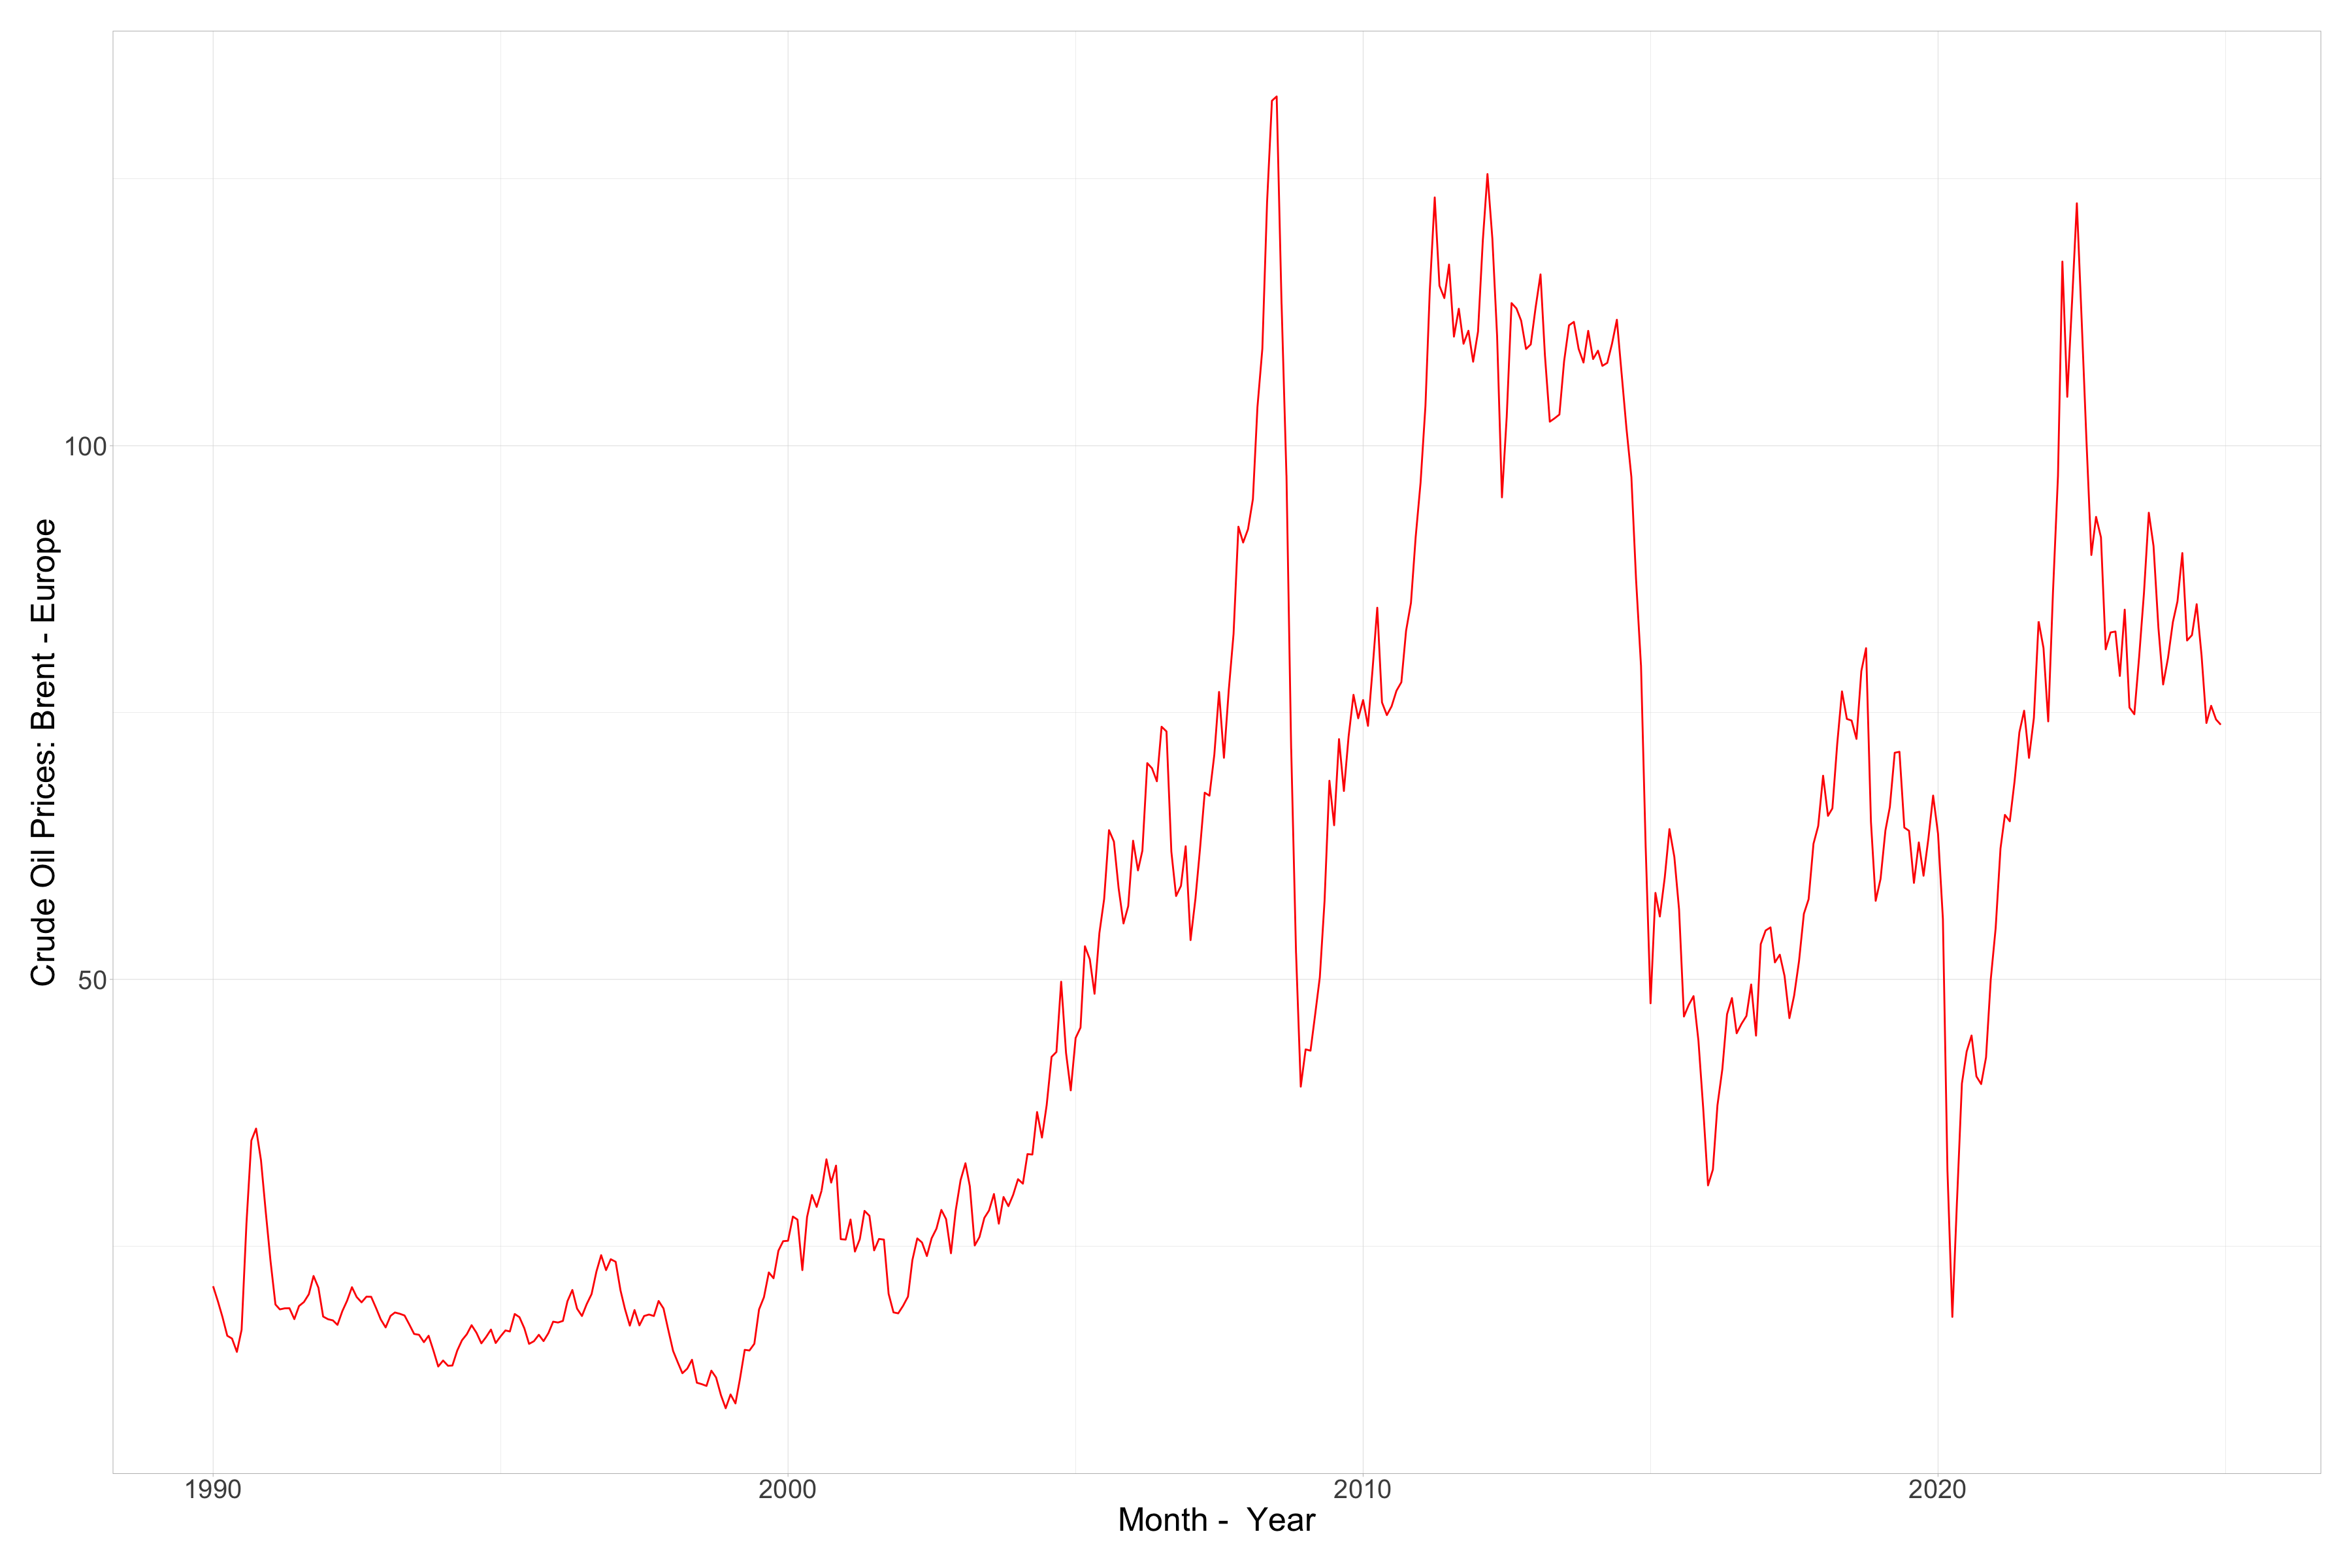

In [105]:
options(repr.plot.width=30, repr.plot.height=20)

fig = autoplot(Brent, size = .8, colour = 'red')
fig = fig +
theme_light() +
theme(plot.margin = ggplot2::margin(1, 1, 1, 1, "cm")) +
theme(text=element_text(size=30)) +
labs(x = "Month -  Year") +
labs(y = "Crude Oil Prices: Brent - Europe")
fig

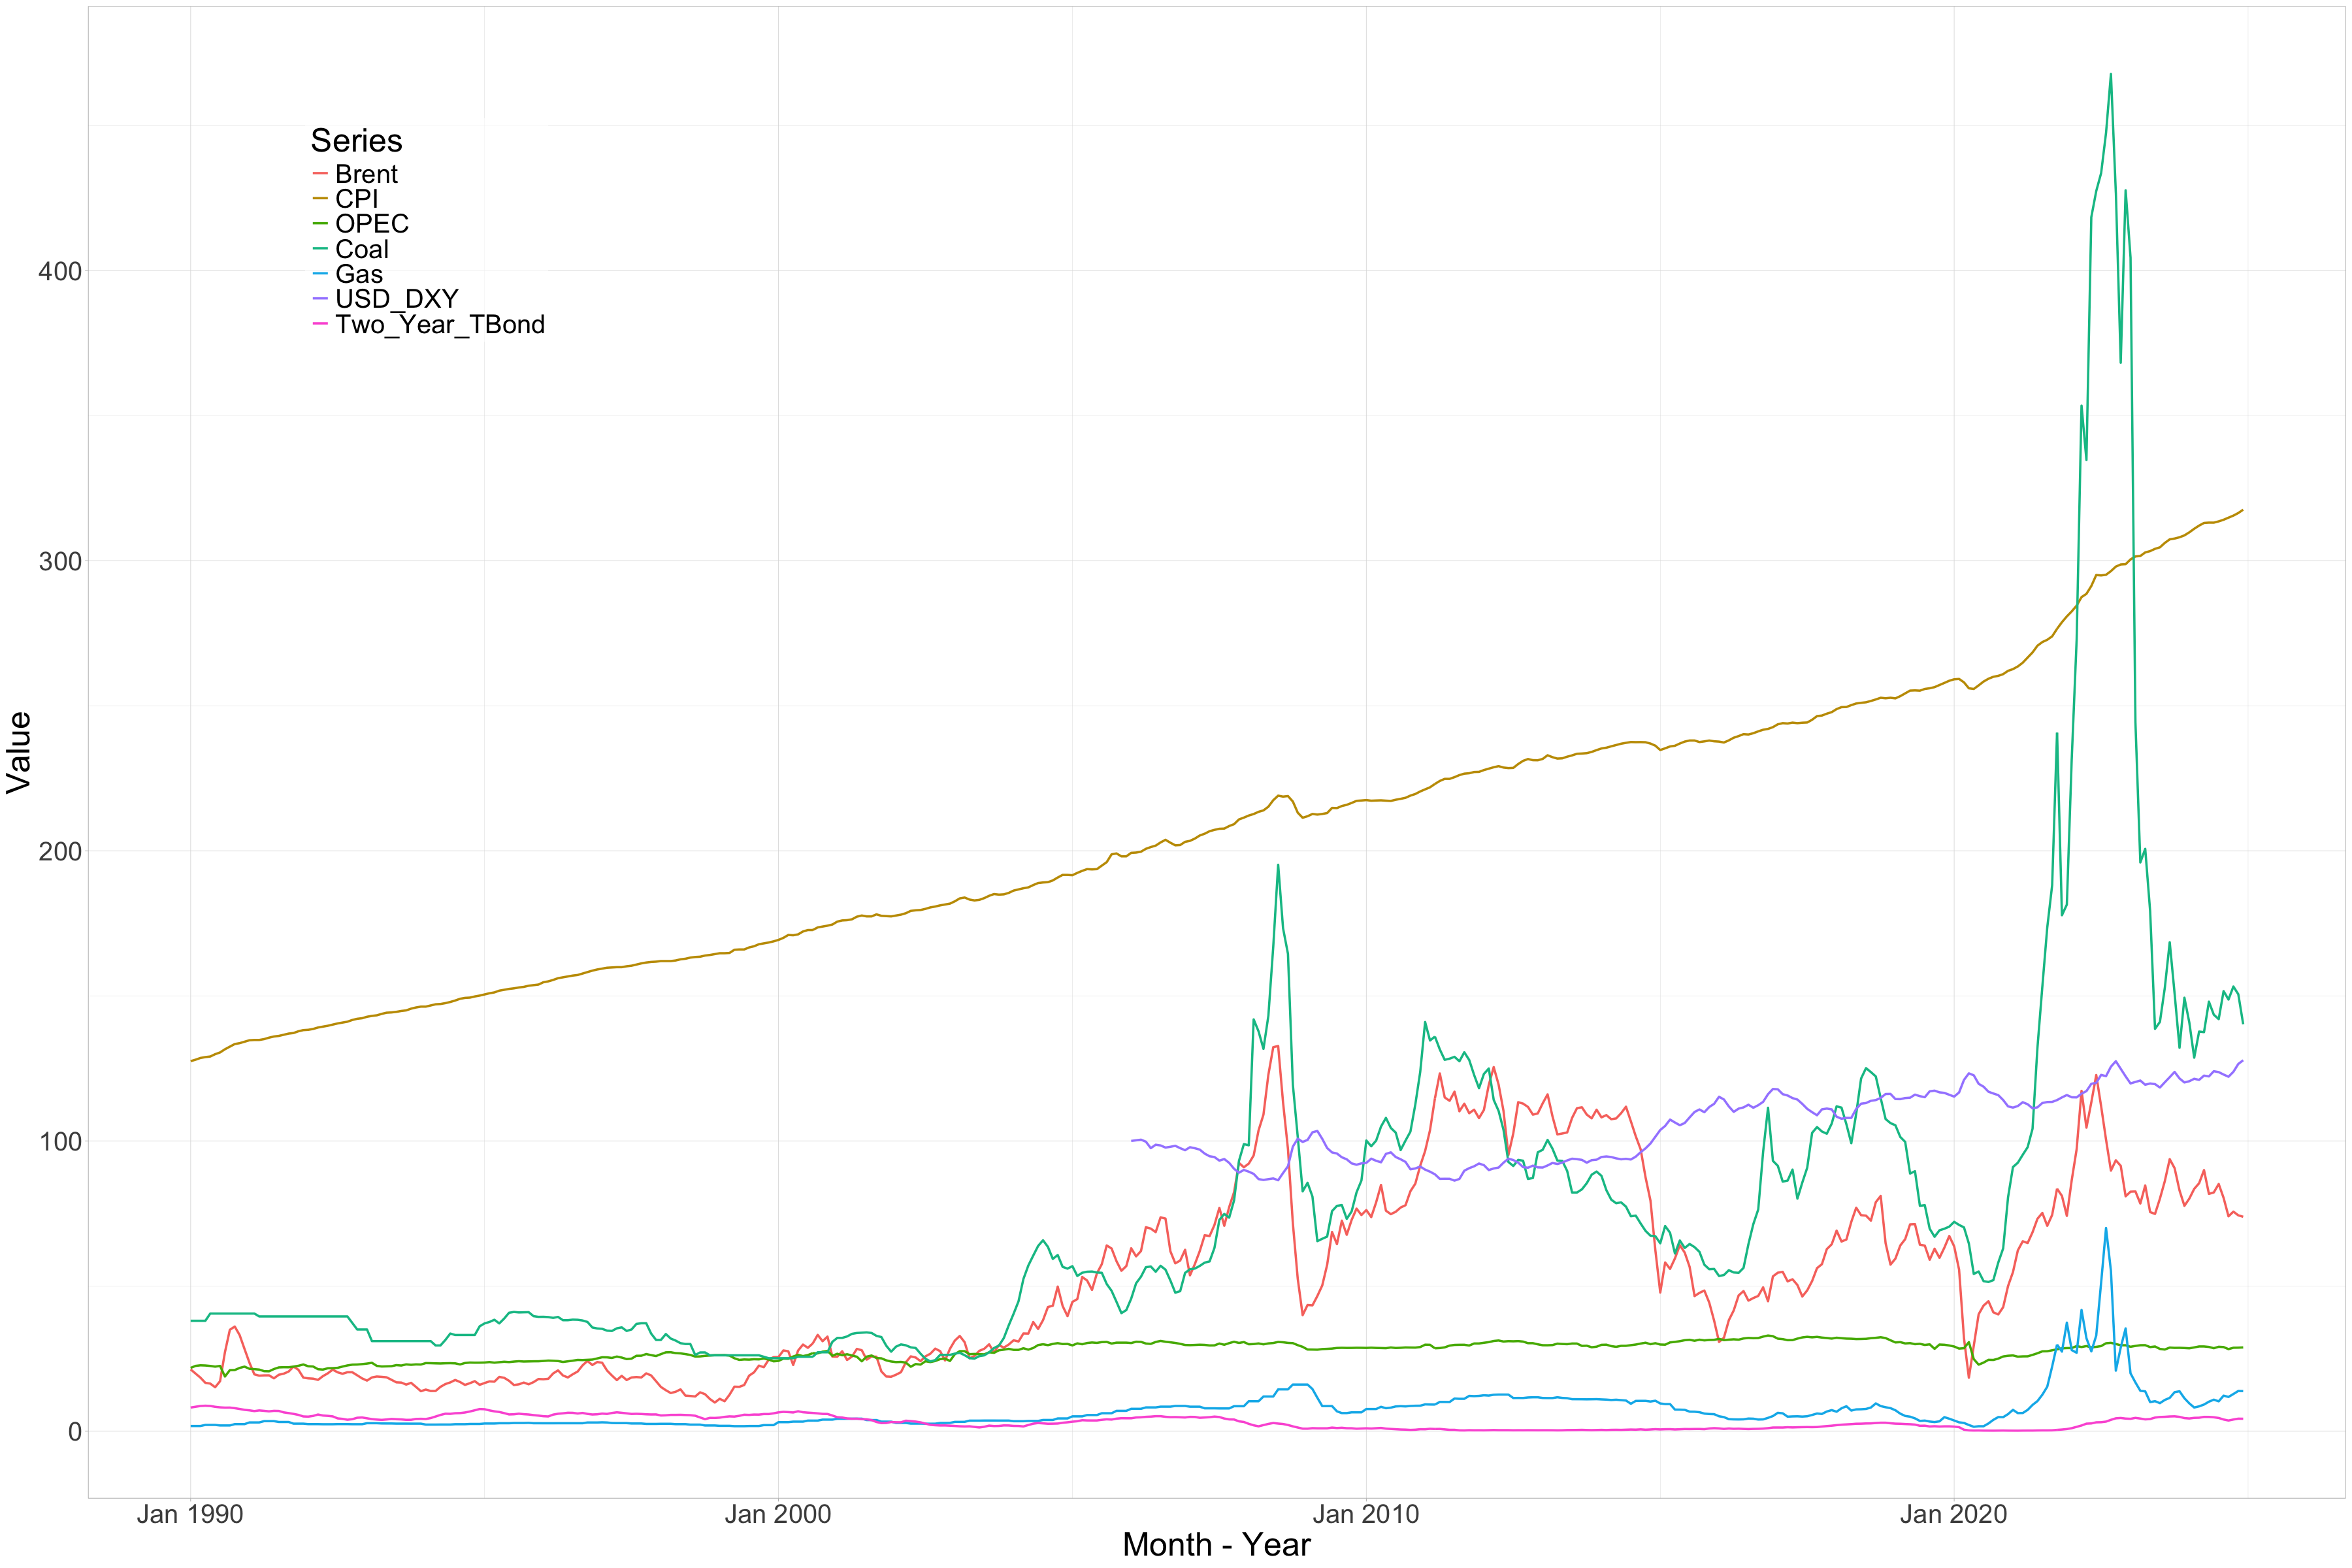

In [100]:
all_series <- merge(Brent, CPI, OPEC, Coal, Gas, USD_DXY, two_year_TBond)
colnames(all_series) <- c("Brent", "CPI", "OPEC", "Coal", "Gas", "USD_DXY", "Two_Year_TBond")

df_long <- fortify(all_series, melt = TRUE)
colnames(df_long) <- c("Date", "Series", "Value")

options(repr.plot.width = 30, repr.plot.height = 20)

fig <- ggplot(df_long, aes(x = Date, y = Value, colour = Series)) +
  geom_line(size = 1) +
  theme_light() +
  theme(
    # aspect.ratio = 1,
    plot.margin = ggplot2::margin(0.2, 0.2, 0.2, 0.2, "cm"),
    text = element_text(size = 30),
    legend.position = c(0.15, 0.85),
    legend.background = element_rect(fill = alpha("white", 0.6)),
    legend.key = element_rect(fill = NA)
  ) +
  labs(
    x = "Month - Year",
    y = "Value",
    colour = "Series"
  )

fig
